In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
np.random.random()

0.9076918432979127

In [3]:
pwd

'/home/ozkan/Desktop/rl_ws/src/scripts/research'

In [56]:
def get_results(i,data):
    log_file_path = f'../Data/{data}/experiment_{i}/Qlearning_Simulation_info.txt'


    # Read the log file
    with open(log_file_path, 'r') as file:
        log_content = file.read()

    # Regular expressions to find all occurrences of the required information and their values
    reward_pattern = re.compile(r'Episode Reward: ([-\d.]+)')
    avg_reward_pattern = re.compile(r'Episode Avg Reward : ([-\d.]+)')
    min_reward_pattern = re.compile(r'Episode Min Reward : ([-\d.]+)')
    step_pattern = re.compile(r'Episode Steps: (\d+)')
    ep_time_pattern = re.compile(r'Episode Time: ([-\d.]+)')

    # Find all matches in the log content
    rewards = [float(match) for match in reward_pattern.findall(log_content)]
    avg_rewards = [float(match) for match in avg_reward_pattern.findall(log_content)]
    min_rewards = [float(match) for match in min_reward_pattern.findall(log_content)]
    steps = [int(match) for match in step_pattern.findall(log_content)]
    ep_time=[float(match) for match in ep_time_pattern.findall(log_content)]

    # Create a DataFrame with the extracted information
    df = pd.DataFrame({
        'Episode': range(1, len(steps) + 1),
        'Steps': steps,
        'Episode Reward': rewards,
        'Episode Avg Reward': avg_rewards,
        'Episode Min Reward': min_rewards,
        'Episode Time': ep_time
    })
    result = {
        'avg_reward': df['Episode Reward'].mean(),
        'avg_last_10_reward': df['Episode Reward'][-10:].mean(),
        'avg_episode_time': df['Episode Time'].mean()
    }

    result_df = pd.DataFrame([result])

  
    # return result_df
    return df
def get_hyperparam(i,data):
    log_file_path = f'../Data/{data}/experiment_{i}/Qlearning_Simulation_metrics.txt'


    # Read the log file
    with open(log_file_path, 'r') as file:
        log_content = file.read()

    exploration=log_file_path.split('/')[2].split('_')[0]

    alpha_pattern = re.compile(r'ALPHA = ([-\d.]+)')
    gamma_pattern = re.compile(r'GAMMA = ([-\d.]+)')
    alpha = [float(match) for match in alpha_pattern.findall(log_content)]
    gamma = [float(match) for match in gamma_pattern.findall(log_content)]
    df = pd.DataFrame({
        'Experiment': i,
        'Alpha': alpha,
        'Gamma': gamma,
        'Exploration': exploration
    })

    if exploration=='epsilon-greedy':
        epsilon_init_pattern = re.compile(r'EPSILON_INIT = ([-\d.]+)')
        epsilon_grad_pattern = re.compile(r'EPSILON_GRAD = ([-\d.]+)')
        epsilon_min_pattern = re.compile(r'EPSILON_MIN = ([-\d.]+)')
        epsilon_init = [float(match) for match in epsilon_init_pattern.findall(log_content)]
        epsilon_grad = [float(match) for match in epsilon_grad_pattern.findall(log_content)]
        epsilon_min = [float(match) for match in epsilon_min_pattern.findall(log_content)]
        df=pd.DataFrame({
            'Epsilon_init': epsilon_init,
            'Epsilon_grad': epsilon_grad,
            'Epsilon_min': epsilon_min,
        })

    return df


    # Create a DataFrame with the extracted information




def get_result_output(n,data):
    output=pd.DataFrame()
    for i in range(1,n+1):
        hp=get_hyperparam(i,data)
        res=get_results(i,data)
        episode=pd.concat([hp,res],axis=1)
        output=pd.concat([output,episode],axis=0)
        
    return output



In [20]:
#softmax-random start
n=15
data=['EpsilonGreedy-Random Start','Softmax-Random Start']
output={}
for i in data:
    print(i)
    output[i]=get_result_output(n,i)

# output=get_result_output(n,data)
output['EpsilonGreedy-Random Start']

EpsilonGreedy-Random Start
Softmax-Random Start


,Experiment,Alpha,Gamma,Exploration,avg_reward,avg_last_10_reward,avg_episode_time
0,1,0.69,0.88,EpsilonGreedy-Random Start,-52.35975,-76.51,25.975925
0,2,0.76,0.84,EpsilonGreedy-Random Start,-64.72525,-48.37,22.979425
0,3,0.85,0.84,EpsilonGreedy-Random Start,-65.71925,-83.00,21.883675
0,4,0.56,0.61,EpsilonGreedy-Random Start,-45.64200,-16.21,27.120800
0,5,0.56,0.89,EpsilonGreedy-Random Start,-76.12425,-8.67,20.685725
0,6,0.35,0.68,EpsilonGreedy-Random Start,-42.34375,-41.99,28.568500
0,7,0.71,0.97,EpsilonGreedy-Random Start,-62.95475,-73.61,24.472725
0,8,0.37,0.66,EpsilonGreedy-Random Start,-84.92675,-0.38,18.974325
0,9,0.24,0.51,EpsilonGreedy-Random Start,-41.39775,-48.25,27.539675
0,10,0.75,0.72,EpsilonGreedy-Random Start,-53.77150,-29.78,25.445550


In [54]:
data=get_result_output(n,'softmax_constant_start')
data

,Experiment,Alpha,Gamma,Exploration,avg_reward,avg_last_10_reward,avg_episode_time
0,1,0.17,0.89,softmax,-52.775,93.20,53.03765
0,2,0.66,0.51,softmax,-15.593,-69.64,54.12875
0,3,0.67,0.87,softmax,3.532,38.16,74.75915
0,4,0.37,0.65,softmax,6.612,101.30,62.88220
0,5,0.70,0.75,softmax,6.719,102.82,67.15780
0,6,0.34,0.73,softmax,49.247,132.80,79.48170
0,7,0.26,0.74,softmax,-22.291,92.98,51.74180
0,8,0.26,0.53,softmax,-81.603,23.54,25.03895
0,9,0.38,0.89,softmax,77.563,124.80,85.45080
0,10,0.63,0.88,softmax,13.502,57.12,78.86915


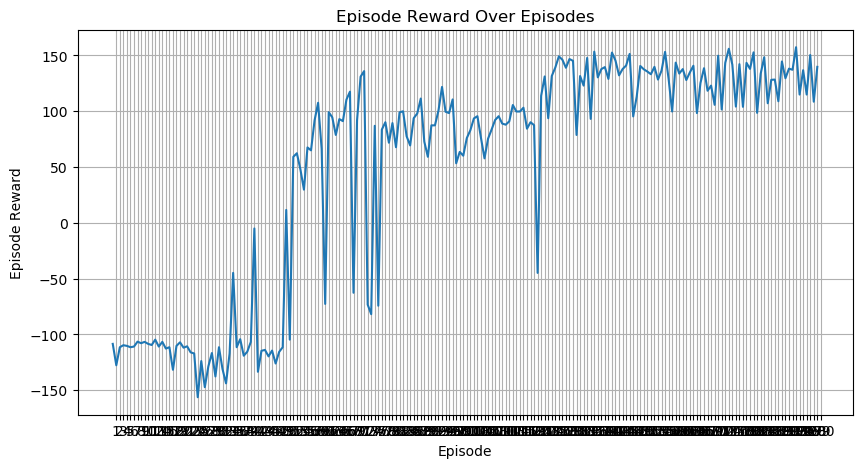

In [58]:
# df=get_results(3,'Softmax-Random Start')
df=get_results(6,'softmax_constant_start')

df=pd.DataFrame(df)
# Plotting the graph
plt.figure(figsize=(10, 5))
plt.plot(df['Episode Reward'])
plt.title('Episode Reward Over Episodes')
plt.xlabel('Episode')
plt.ylabel('Episode Reward')
plt.grid(True)
plt.xticks(df['Episode'])
plt.show()

In [10]:

log_file_path = f'../Data/softmax/Hyperparam_opt_logs_15/Qlearning_Simulation_info.txt'


# Read the log file
with open(log_file_path, 'r') as file:
    log_content = file.read()

# Regular expressions to find all occurrences of the required information and their values
reward_pattern = re.compile(r'Episode Reward: ([-\d.]+)')
avg_reward_pattern = re.compile(r'Episode Avg Reward : ([-\d.]+)')
min_reward_pattern = re.compile(r'Episode Min Reward : ([-\d.]+)')
step_pattern = re.compile(r'Episode Steps: (\d+)')
ep_time_pattern = re.compile(r'Episode Time: ([-\d.]+)')

# Find all matches in the log content
rewards = [float(match) for match in reward_pattern.findall(log_content)]
avg_rewards = [float(match) for match in avg_reward_pattern.findall(log_content)]
min_rewards = [float(match) for match in min_reward_pattern.findall(log_content)]
steps = [int(match) for match in step_pattern.findall(log_content)]
ep_time=[float(match) for match in ep_time_pattern.findall(log_content)]

# Create a DataFrame with the extracted information
df = pd.DataFrame({
    'Episode': range(1, len(steps) + 1),
    'Steps': steps,
    'Episode Reward': rewards,
    'Episode Avg Reward': avg_rewards,
    'Episode Min Reward': min_rewards,
    'Episode Time': ep_time
})

# df=pd.DataFrame(df.mean()).T
# df['last_100_reward']=df['Episode Reward'][-10:].mean()
result = {
    'avg_reward': df['Episode Reward'].mean(),
    'avg_last_10_reward': df['Episode Reward'][-10:].mean(),
    'avg_episode_time': df['Episode Time'].mean()
}

result_df = pd.DataFrame([result])

result_df

,avg_reward,avg_last_10_reward,avg_episode_time
0,-43.672,60.64,29.635


In [11]:
df['Episode Reward'].mean()

-43.672000000000004

In [12]:
df['Episode Reward'][-10:].mean()

60.64

In [13]:
df.describe()

,Episode,Steps,Episode Reward,Episode Avg Reward,Episode Min Reward,Episode Time
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,146.400000,-43.672000,-2.338100,-60.240000,29.635000
std,29.011492,133.305224,80.805678,2.267049,48.941177,26.695146
min,1.000000,22.000000,-123.200000,-4.990000,-100.000000,4.690000
25%,25.750000,26.000000,-111.250000,-4.442500,-100.000000,5.517500
50%,50.500000,29.000000,-106.200000,-4.050000,-100.000000,6.140000
75%,75.250000,300.000000,54.400000,0.182500,-0.600000,60.382500
max,100.000000,300.000000,67.600000,0.230000,-0.600000,60.450000


In [59]:
import random
def random_search_hyperparams(n=15):
    hyperparam_ranges = {
        'alpha': [0.1, 0.9],  # Learning rate
        'gamma': [0.5, 0.99],  # Discount factor
        't_init': [5, 50],  
        't_grad': [0.9, 0.99], 
        't_min': [0.001, 0.1], 
        'epsilon_init': [0.1, 1],  # Initial epsilon for epsilon-greedy exploration
        'epsilon_grad': [0.9, 0.99],  # Epsilon decay rate
        'epsilon_min': [0.001, 0.1]  # Minimum epsilon
    }

    hyperparam_sets = []

    for _ in range(n):
        selected_hyperparams = {param: random.uniform(*range) for param, range in hyperparam_ranges.items()}
        hyperparam_sets.append(selected_hyperparams)

    return hyperparam_sets

random_search_hyperparams(5)


[{'alpha': 0.4274147335645607,
  'gamma': 0.660821517453465,
  't_init': 20.852468884723358,
  't_grad': 0.901514130469204,
  't_min': 0.04274126540578718,
  'epsilon_init': 0.832773161104039,
  'epsilon_grad': 0.9345350887629152,
  'epsilon_min': 0.03862901200040931},
 {'alpha': 0.7600720069921304,
  'gamma': 0.988190182210771,
  't_init': 48.735240057128884,
  't_grad': 0.98714854875273,
  't_min': 0.017562484334485016,
  'epsilon_init': 0.22012871229557313,
  'epsilon_grad': 0.9697567946292514,
  'epsilon_min': 0.06273794293128507},
 {'alpha': 0.16499169695071025,
  'gamma': 0.5691763626201127,
  't_init': 40.85121385192582,
  't_grad': 0.967237005572912,
  't_min': 0.04950431913734239,
  'epsilon_init': 0.2975271114849024,
  'epsilon_grad': 0.9678129295881788,
  'epsilon_min': 0.08785439074964924},
 {'alpha': 0.7901355270103937,
  'gamma': 0.7157846842750368,
  't_init': 25.1030295878423,
  't_grad': 0.9573481050069925,
  't_min': 0.04743132057414321,
  'epsilon_init': 0.7428195744

In [60]:
hyperparameter_sets = {
    # Scenario 1: Baseline
    'Scenario_1_Moderate': 

    {'alpha': 0.5, 'gamma': 0.9, 't_init': 25, 't_grad': 0.95, 't_min': 0.05, 
     'epsilon_init': 0.5, 'epsilon_grad': 0.97, 'epsilon_min': 0.05},

    # Scenario 2: Faster Learning, High Exploration
    'Scenario_2_Fast_Learning_High_Exploration': 
    {'alpha': 0.7, 'gamma': 0.8, 't_init': 35, 't_grad': 0.93, 't_min': 0.05,
     'epsilon_init': 0.8, 'epsilon_grad': 0.95, 'epsilon_min': 0.1},

    # Scenario 3: Faster Learning, Low Exploration 
    'Scenario_3_Fast_Learning_Low_Exploration': 
    {'alpha': 0.7, 'gamma': 0.85, 't_init': 15, 't_grad': 0.96, 't_min': 0.03,
     'epsilon_init': 0.4, 'epsilon_grad': 0.98, 'epsilon_min': 0.08},

   # Scenario 4: Slower Learning, High Exploration 
   'Scenario_4_Slow_Learning_High_Exploration': 
    {'alpha': 0.3, 'gamma': 0.95, 't_init': 30, 't_grad': 0.99, 't_min': 0.05,
     'epsilon_init': 0.9, 'epsilon_grad': 0.995, 'epsilon_min': 0.2},

    # Scenario 5: Slow Learning, Low Exploration 
    'Scenario_5_Slow_Learning_Low_Exploration': 
    {'alpha': 0.2, 'gamma': 0.7, 't_init': 10, 't_grad': 0.92, 't_min': 0.01,
     'epsilon_init': 0.4, 'epsilon_grad': 0.98, 'epsilon_min': 0.05},

}

In [62]:
for key in hyperparameter_sets:
    print(key)
    print(hyperparameter_sets[key])

Scenario_1_Moderate
{'alpha': 0.5, 'gamma': 0.9, 't_init': 25, 't_grad': 0.95, 't_min': 0.05, 'epsilon_init': 0.5, 'epsilon_grad': 0.97, 'epsilon_min': 0.05}
Scenario_2_Fast_Learning_High_Exploration
{'alpha': 0.7, 'gamma': 0.8, 't_init': 35, 't_grad': 0.93, 't_min': 0.05, 'epsilon_init': 0.8, 'epsilon_grad': 0.95, 'epsilon_min': 0.1}
Scenario_3_Fast_Learning_Low_Exploration
{'alpha': 0.7, 'gamma': 0.85, 't_init': 15, 't_grad': 0.96, 't_min': 0.03, 'epsilon_init': 0.4, 'epsilon_grad': 0.98, 'epsilon_min': 0.08}
Scenario_4_Slow_Learning_High_Exploration
{'alpha': 0.3, 'gamma': 0.95, 't_init': 30, 't_grad': 0.99, 't_min': 0.05, 'epsilon_init': 0.9, 'epsilon_grad': 0.995, 'epsilon_min': 0.2}
Scenario_5_Slow_Learning_Low_Exploration
{'alpha': 0.2, 'gamma': 0.7, 't_init': 10, 't_grad': 0.92, 't_min': 0.01, 'epsilon_init': 0.4, 'epsilon_grad': 0.98, 'epsilon_min': 0.05}


In [63]:
hyperparam_sets = [
    # Scenario 1: Baseline
    {'alpha': 0.5, 'gamma': 0.9, 't_init': 25, 't_grad': 0.95, 't_min': 0.05, 
     'epsilon_init': 0.5, 'epsilon_grad': 0.97, 'epsilon_min': 0.05},

    # Scenario 2: Faster Learning, High Exploration
    {'alpha': 0.7, 'gamma': 0.8, 't_init': 35, 't_grad': 0.93, 't_min': 0.05,
     'epsilon_init': 0.8, 'epsilon_grad': 0.95, 'epsilon_min': 0.1},

    # Scenario 3: Faster Learning, Low Exploration 
    {'alpha': 0.7, 'gamma': 0.85, 't_init': 15, 't_grad': 0.96, 't_min': 0.03,
     'epsilon_init': 0.4, 'epsilon_grad': 0.98, 'epsilon_min': 0.08},

   # Scenario 4: Slower Learning, High Exploration 
    {'alpha': 0.3, 'gamma': 0.95, 't_init': 30, 't_grad': 0.99, 't_min': 0.05,
     'epsilon_init': 0.9, 'epsilon_grad': 0.995, 'epsilon_min': 0.2},

    # Scenario 5: Slow Learning, Low Exploration 
    {'alpha': 0.2, 'gamma': 0.7, 't_init': 10, 't_grad': 0.92, 't_min': 0.01,
     'epsilon_init': 0.4, 'epsilon_grad': 0.98, 'epsilon_min': 0.05},

]
hyperparam_sets[1]

{'alpha': 0.7,
 'gamma': 0.8,
 't_init': 35,
 't_grad': 0.93,
 't_min': 0.05,
 'epsilon_init': 0.8,
 'epsilon_grad': 0.95,
 'epsilon_min': 0.1}